# Getting Data

In [92]:
import pandas as pd #library imported (hereinafter comments are in Eng to minimize layout switching)
WSample = pd.read_excel("rates.xlsx") #getting dataframe
WSample #visualizing to check if we have right dataframe

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США
...,...,...,...,...
512,1,2020-02-05,63.4342,Доллар США
513,1,2020-02-06,63.1742,Доллар США
514,1,2020-02-07,62.7977,Доллар США
515,1,2020-02-08,63.4720,Доллар США


# Repeating online course (MLPRegressor)

In [6]:
from sklearn.neural_network import MLPRegressor #importing multilayer perceptron neural network algorithm

In [8]:
MLP = MLPRegressor(random_state=42) #42, as it was agreed
rates = WSample['curs'] #testing another type of syntaxis found in manuals
future = 7 #deem it constant to keep results' comparability
past = 28 #here is the 1st opportunity for optimization
start = past
end = len(rates) - future
preDF = [] #clear array for formatted data
for i in range(start,end):
    Line = rates[(i-past):(i+future)] #collecting another line of sample data - ins and outs for ML
    preDF.append(list(Line)) #adding Line as an element to the end of MLDF
p_cols = [f"p_{i}" for i in range(past)] #creating columns' names for inputs (past values)
f_cols = [f"f_{i}" for i in range(future)] #creating columns' names for output (future values)
DF = pd.DataFrame(preDF, columns = (p_cols + f_cols)) #surprisingly, "dataframe" doesn't work, capitals reqired...
X = DF[p_cols][:-1] #ins in training set
y = DF[f_cols][:-1] #outs in training set
X_t = DF[p_cols][-1:] #ins in test set
y_t = DF[f_cols][-1:] #outs in test set
MLP.fit(X,y) #learning

C:\Users\vertc_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
y_pred = MLP.predict(X_t) #making predictions

 Mean absolute error: 1.0727884230289217


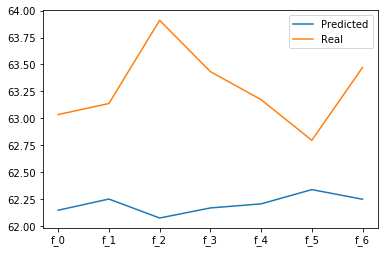

In [93]:
from matplotlib import pyplot #another syntax also seems to be working.. Python is very tolerant :)
from sklearn.metrics import mean_absolute_error
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

# Optimization (MLPRegressor + GridSearchCV)

Well, the m.a.error = 1.21 is already better than it was online :), but lets try to optimize...
First decision was to use iterative method to find most suitable parameters, but reading manuals saved me from huge ugly circles: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [79]:
from sklearn.model_selection import GridSearchCV #helps to select best parameters for an estimator
parameter_space = {
    'max_iter': [300, 400, 500, 600, 700], #200 is not enought, lets try more...
    'hidden_layer_sizes': [(50,50,50), (100,), (25, 20, 15, 10), (200,),], #feeling lack of expirience, this list is almost random...
    'alpha': [0.0001, 0.0005, 0.001], #just trying random things and default value
    'random_state': [42], #not sure if I had to set it that way, but just in case...
}

Keeping in mind that the zero error is not the aim, here I stopped copying all possible sets of parameters from
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [80]:
GS = GridSearchCV(estimator=MLP, param_grid=parameter_space, n_jobs=-1, cv=3) 
GS.fit(X, y)
print('Best parameters for MLP:\n', GS.best_params_)

Best parameters for MLP:
 {'alpha': 0.0005, 'hidden_layer_sizes': (50, 50, 50), 'max_iter': 700, 'random_state': 42}


In [81]:
y_pred = GS.predict(X_t) #making predictions

 Mean absolute error: 1.0727884230289217


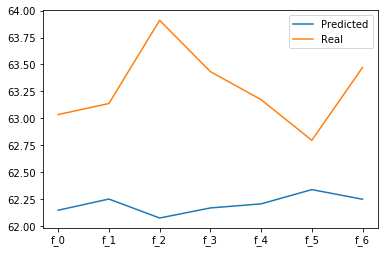

In [83]:
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

This is the same as:

 Mean absolute error: 1.0727884230289217


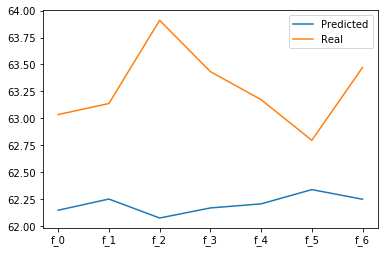

In [98]:
MLP_improved = MLPRegressor(random_state=42, alpha = 0.0005, hidden_layer_sizes = (50, 50, 50), max_iter =700) 
MLP_improved.fit(X,y) #learning
y_pred = MLP_improved.predict(X_t)
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

Lets find more estimators, using
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# ExtraTreesRegressor

 Mean absolute error: 0.3728524285714282


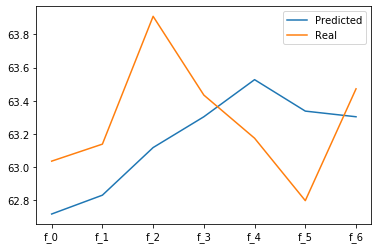

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
regr = ExtraTreesRegressor(n_estimators=100, random_state = 42) #adding more estimators changes result insufficiently
regr.fit(X, y)
y_pred = regr.predict(X_t)
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

#  BaggingRegressor

 Mean absolute error: 0.39853565714282063


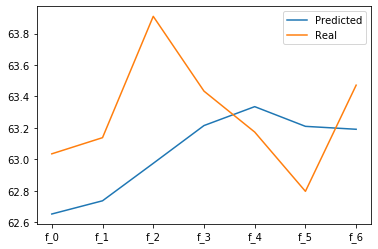

In [115]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(n_estimators=250, random_state = 42) #adding more estimators changes result insufficiently
regr.fit(X, y)
y_pred = regr.predict(X_t)
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

# Ridge

 Mean absolute error: 0.6891777076207413


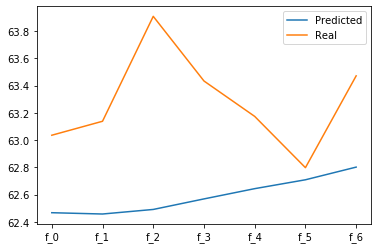

In [123]:
 from sklearn.linear_model import Ridge
regr = Ridge(alpha=100.0) #increasing parameter alpha helps to insufficiently decrease the error, 
                            #but smoothes the line shape and blur the trend
regr.fit(X, y)
y_pred = regr.predict(X_t)
pyplot.plot(y_pred[0], label = "Predicted")
pyplot.plot(y_t.iloc[0], label = "Real")
pyplot.legend()
print (f" Mean absolute error: {mean_absolute_error(y_pred[0], y_t.iloc[0])}")

# Conclusions

Regression estimators are deemed to be the most sutable ones for quantity prediction (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Among them there are:
Linear Algorithms:
— Linear Regression 
— Ridge Regression 
— Lasso Regression 
— Elastic Net Regression 
— Least Angle Regression 
— Bayesian ridge regression 
Nonlinear Algorithms:
— k-nearest neighbors regressor
— Decision Tree Regressor 
— Linear Support Vector Machine
— Epsilon-Support Vector Regression 
Ensemble Algorithms:
— AdaBoost Regressor
— Bagging Regressor
— Extra Trees Regressor
— Gradient Boosting Regressor
— Random Forest Classifier
Choise of specific algorithm depends on dataset and prediction purposes. Some of them require data normalization, others do not.
The best perfomance in our case was shown by ensemble algorithms (Bagging Regressor and Extra Trees Regressor).
For optimisation of algorithms (i.e. neural network architecture) it is advised to use special helpers, such as GridSearchCV. It consumes machine time, but allows the operator to drink a cup of coffee.